In [1]:
import pandas as pd
date_str = '2021-12-06'

In [2]:
%%time
df_MAG_PubMedID = pd.read_csv("../Final-Data/Data-Tables-MAG_" + date_str + "/df_MAG_ID121PubMedID.csv", sep='\t')
df_MAG_PubMedID
# MAG-Paper-PubMed.ipynb

/home/zla6184/.conda/envs/newcv/lib/python3.9/site-packages/IPython/core/magics/execution.py:1321: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 8.88 s, sys: 1.76 s, total: 10.6 s
Wall time: 10.7 s


,0,2
0,23,22260809
1,290,3738373
2,548,2195785
3,763,11581205
4,1921,8446019
...,...,...
31230201,3026081580,32053780
31230202,3096051705,33140623
31230203,3207782474,34808235
31230204,3195593967,34859247


In [5]:
# df_NIH = pd.read_csv('../../DataLake/NIH_exporter/REPORTER_PUBLNK_C_'+str(2020)+'.csv')
# df_NIH

,PMID,PROJECT_NUMBER
0,33227003,T32GM008715
1,32191639,UM1AI126623
2,33355532,R01CA195670
3,32908257,U41HG010972
4,33033190,S10OD018149
...,...,...
297709,33554132,S10RR029220
297710,32388926,R01AR056702
297711,32387915,T32DA035200
297712,32515231,U19OH008861


In [6]:
# df_NIH2 = pd.read_csv('../../DataLake/NIH_exporter/RePORTER_PUBLNK_C_'+str(1980)+'.csv')
# df_NIH2

,PMID,PROJECT_NUMBER
0,7420349,R01CA024975
1,7203667,Z01HD000364
2,6162027,R01AM013131
3,6777439,R01AI011271
4,7436412,R01AM019031
...,...,...
24335,7425661,P06RR000163
24336,6159081,R01CA014958
24337,7002609,R01CA021955
24338,7409161,R01HD011697


In [7]:
# df_NIH3 = pd.concat([df_NIH, df_NIH2], ignore_index=True)
# df_NIH3

,PMID,PROJECT_NUMBER
0,33227003,T32GM008715
1,32191639,UM1AI126623
2,33355532,R01CA195670
3,32908257,U41HG010972
4,33033190,S10OD018149
...,...,...
322049,7425661,P06RR000163
322050,6159081,R01CA014958
322051,7002609,R01CA021955
322052,7409161,R01HD011697


In [9]:
from tqdm import tqdm
import copy
chunks = []
tot_length = 0
for i in tqdm(range(1980,2016)):
    df_NIH = pd.read_csv('../../DataLake/NIH_exporter/RePORTER_PUBLNK_C_'+str(i)+'.csv')
    tot_length += len(df_NIH)
    chunks.append(copy.deepcopy(df_NIH))
for i in tqdm(range(2016,2021)):
    df_NIH = pd.read_csv('../../DataLake/NIH_exporter/REPORTER_PUBLNK_C_'+str(i)+'.csv')
    tot_length += len(df_NIH)
    chunks.append(copy.deepcopy(df_NIH))

100%|██████████| 5/5 [00:00<00:00,  5.82it/s]


In [10]:
df_PMID_NIH = pd.concat(chunks, ignore_index=True)
print(tot_length)
df_PMID_NIH

6086348


,PMID,PROJECT_NUMBER
0,7420349,R01CA024975
1,7203667,Z01HD000364
2,6162027,R01AM013131
3,6777439,R01AI011271
4,7436412,R01AM019031
...,...,...
6086343,33554132,S10RR029220
6086344,32388926,R01AR056702
6086345,32387915,T32DA035200
6086346,32515231,U19OH008861


In [11]:
len(df_PMID_NIH['PMID'].unique())

2667105

In [12]:
df_MAG_PubMedID['2']

0           22260809
1            3738373
2            2195785
3           11581205
4            8446019
              ...   
31230201    32053780
31230202    33140623
31230203    34808235
31230204    34859247
31230205    34817711
Name: 2, Length: 31230206, dtype: object

In [14]:
df_MAG_PubMedID.rename(columns={"0": "MAGID", "2": "PMID"}, inplace=True)
df_MAG_PubMedID

,MAGID,PMID
0,23,22260809
1,290,3738373
2,548,2195785
3,763,11581205
4,1921,8446019
...,...,...
31230201,3026081580,32053780
31230202,3096051705,33140623
31230203,3207782474,34808235
31230204,3195593967,34859247


In [22]:
%%time
df_PMID_NIH.PMID = df_PMID_NIH.PMID.astype(str)
df_MAG_PubMedID.PMID = df_MAG_PubMedID.PMID.astype(str)
df_MAG_NIH = df_MAG_PubMedID.merge(df_PMID_NIH, how='inner', on='PMID')
df_MAG_NIH

CPU times: user 47.1 s, sys: 2.79 s, total: 49.9 s
Wall time: 49.7 s


,MAGID,PMID,PROJECT_NUMBER
0,3066,9923457,R29HL057675
1,3066,9923457,R01HL057675
2,3066,9923457,R01HL054973
3,15845,17127250,P01HD030367
4,15845,17127250,M01RR000056
...,...,...,...
6019894,246319838,12432827,R01NS038713
6019895,2082844918,12958435,R01MH061138
6019896,2082844918,12958435,R01NS038894
6019897,2069345940,11758118,P01AR038923


In [23]:
len(df_MAG_NIH) / len(df_PMID_NIH)

0.9890822871120745

In [24]:
# df_MAG_NIH.to_csv('./Data-Linkage/Link_MAG_PMID_NIHproj.csv', sep='\t', index=False)

# Read Link_MAG_NIH

In [1]:
import pandas as pd
df_MAG_NIH_New = pd.read_csv('./Data-Linkage/Link_MAG_PMID_NIHproj.csv', sep='\t')
df_MAG_NIH_New

,MAGID,PMID,PROJECT_NUMBER
0,3066,9923457,R29HL057675
1,3066,9923457,R01HL057675
2,3066,9923457,R01HL054973
3,15845,17127250,P01HD030367
4,15845,17127250,M01RR000056
...,...,...,...
6019894,246319838,12432827,R01NS038713
6019895,2082844918,12958435,R01MH061138
6019896,2082844918,12958435,R01NS038894
6019897,2069345940,11758118,P01AR038923


In [5]:
%%time
df_MAG_NIH_New_cnt0 = df_MAG_NIH_New.groupby(['PROJECT_NUMBER'],as_index=False)['MAGID'].agg(['count']).reset_index().sort_values(['count'], ascending=False)
df_MAG_NIH_New_cnt0
# Counting how many papers per NIH project

CPU times: user 1.69 s, sys: 127 ms, total: 1.81 s
Wall time: 1.81 s


,PROJECT_NUMBER,count
80616,P30CA016672,17535
80571,P30CA008748,14309
80631,P30CA021765,7426
76130,P01CA016672,6006
368928,UL1TR001863,4640
...,...,...
320646,R36MH080607,1
214410,R01HL065231,1
36725,F33AR008261,1
214413,R01HL065255,1


In [4]:
df_MAG_NIH_New.loc[df_MAG_NIH_New['PROJECT_NUMBER'] == 'P30CA016672',:]

,MAGID,PMID,PROJECT_NUMBER
80,156741,22027907,P30CA016672
110,205112,25725225,P30CA016672
851,2068184,8687106,P30CA016672
2428,6277105,8869966,P30CA016672
3058,8015635,3484978,P30CA016672
...,...,...,...
6017008,2593136129,27903150,P30CA016672
6018128,2921950308,30358843,P30CA016672
6018137,2913629815,30379613,P30CA016672
6018183,2907010595,30537407,P30CA016672


In [6]:
df_MAG_NIH_New_cnt0.rename(columns={'count':'sup_paper_num'},inplace=True)
df_MAG_NIH_New_cnt0

,PROJECT_NUMBER,sup_paper_num
80616,P30CA016672,17535
80571,P30CA008748,14309
80631,P30CA021765,7426
76130,P01CA016672,6006
368928,UL1TR001863,4640
...,...,...
320646,R36MH080607,1
214410,R01HL065231,1
36725,F33AR008261,1
214413,R01HL065255,1


In [8]:
%%time
df_MAG_NIH_New_cnt1 = df_MAG_NIH_New_cnt0.groupby(['sup_paper_num'])['PROJECT_NUMBER'].agg(
    ['count']).reset_index().sort_values(['count'], ascending=False)
df_MAG_NIH_New_cnt1

CPU times: user 109 ms, sys: 1.94 ms, total: 111 ms
Wall time: 109 ms


,sup_paper_num,count
0,1,70226
1,2,44102
2,3,33195
3,4,25985
4,5,20895
...,...,...
687,798,1
686,797,1
685,796,1
684,794,1


In [11]:
df_MAG_NIH_New_cnt1.head(100)

,sup_paper_num,count
0,1,70226
1,2,44102
2,3,33195
3,4,25985
4,5,20895
...,...,...
93,94,143
96,97,140
94,95,138
95,96,132


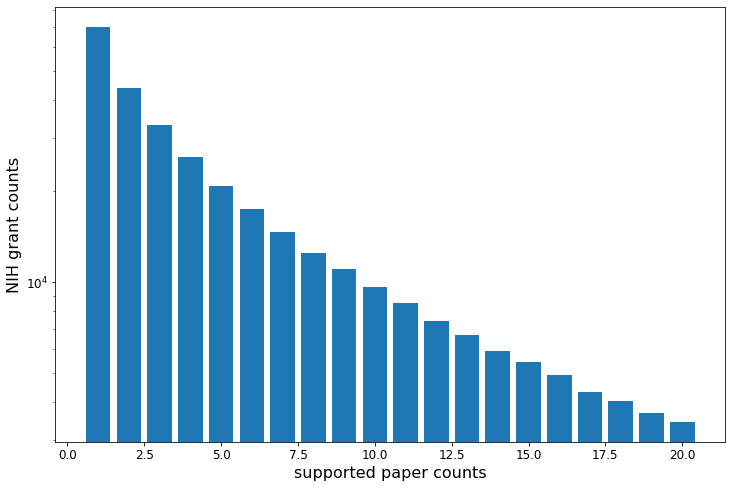

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
colors = [i for i in cm.get_cmap('tab20').colors]
fig, ax1 = plt.subplots(figsize=(12, 8))
x = np.arange(20) + 1
ax1.bar(x, 
        df_MAG_NIH_New_cnt1.head(20)['count'].values,
        color=colors[0])
ax1.set_xlabel('supported paper counts', fontsize=16)
ax1.set_ylabel('NIH grant counts', fontsize=16)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
# ax1.set_xscale('log')

In [27]:
df_MAG_NIH_New

,MAGID,PMID,PROJECT_NUMBER
0,3066,9923457,R29HL057675
1,3066,9923457,R01HL057675
2,3066,9923457,R01HL054973
3,15845,17127250,P01HD030367
4,15845,17127250,M01RR000056
...,...,...,...
6019894,246319838,12432827,R01NS038713
6019895,2082844918,12958435,R01MH061138
6019896,2082844918,12958435,R01NS038894
6019897,2069345940,11758118,P01AR038923


In [28]:
len(df_MAG_NIH_New['MAGID'].unique())

2636061

In [29]:
len(df_MAG_NIH_New['PROJECT_NUMBER'].unique())

379014

# Supporting grant counts per paper

In [30]:
%%time
df_MAG_NIH_New_cnt2 = df_MAG_NIH_New.groupby(['MAGID'],as_index=False)['PROJECT_NUMBER'].agg(['count']).reset_index().sort_values(['count'], ascending=False)
df_MAG_NIH_New_cnt2
# Counting how many NIH grants support a paper

CPU times: user 1.07 s, sys: 136 ms, total: 1.2 s
Wall time: 1.2 s


,MAGID,count
935745,2040964350,192
2189272,2519445944,190
2294848,2752326209,187
2416778,2898585601,181
1755852,2144405108,151
...,...,...
1492082,2105346239,1
1492079,2105345718,1
1492078,2105345395,1
425746,1984365483,1


In [31]:
df_MAG_NIH_New_cnt2.rename(columns={'count':'NIH_count'}, inplace=True)
df_MAG_NIH_New_cnt2

,MAGID,NIH_count
935745,2040964350,192
2189272,2519445944,190
2294848,2752326209,187
2416778,2898585601,181
1755852,2144405108,151
...,...,...
1492082,2105346239,1
1492079,2105345718,1
1492078,2105345395,1
425746,1984365483,1


In [32]:
# df_MAG_NIH_New_cnt2.to_csv('./Data-Linkage/MAGID_NIHcount.csv', sep='\t', index=False)

# Read MAGID to NIH Grant Count

In [33]:
import pandas as pd
MAGID_NIHcount = pd.read_csv('./Data-Linkage/MAGID_NIHcount.csv', sep='\t')
MAGID_NIHcount

,MAGID,NIH_count
0,2040964350,192
1,2519445944,190
2,2752326209,187
3,2898585601,181
4,2144405108,151
...,...,...
2636056,2105346239,1
2636057,2105345718,1
2636058,2105345395,1
2636059,1984365483,1


In [34]:
%%time
MAGID_NIHcount1 = MAGID_NIHcount.groupby(['NIH_count'])['MAGID'].agg(
    ['count']).reset_index().sort_values(['count'], ascending=False)
MAGID_NIHcount1

CPU times: user 62.1 ms, sys: 18 ms, total: 80.1 ms
Wall time: 77.7 ms


,NIH_count,count
0,1,1176211
1,2,673681
2,3,372215
3,4,188043
4,5,92150
...,...,...
103,108,1
102,106,1
100,102,1
99,101,1


In [38]:
MAGID_NIHcount1.head(20)

,NIH_count,count
0,1,1176211
1,2,673681
2,3,372215
3,4,188043
4,5,92150
5,6,50270
6,7,27585
7,8,16822
8,9,10707
9,10,7208


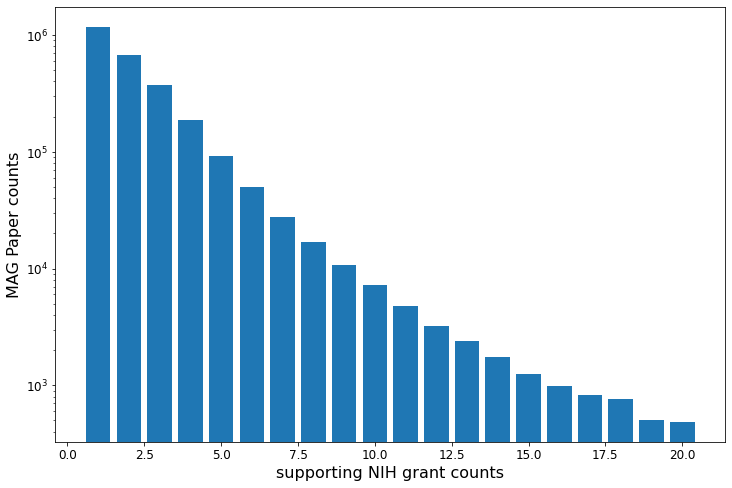

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
colors = [i for i in cm.get_cmap('tab20').colors]
fig, ax1 = plt.subplots(figsize=(12, 8))
x = np.arange(20) + 1
ax1.bar(x, 
        MAGID_NIHcount1.head(20)['count'].values,
        color=colors[0])
ax1.set_xlabel('supporting NIH grant counts', fontsize=16)
ax1.set_ylabel('MAG Paper counts', fontsize=16)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
# ax1.set_xscale('log')

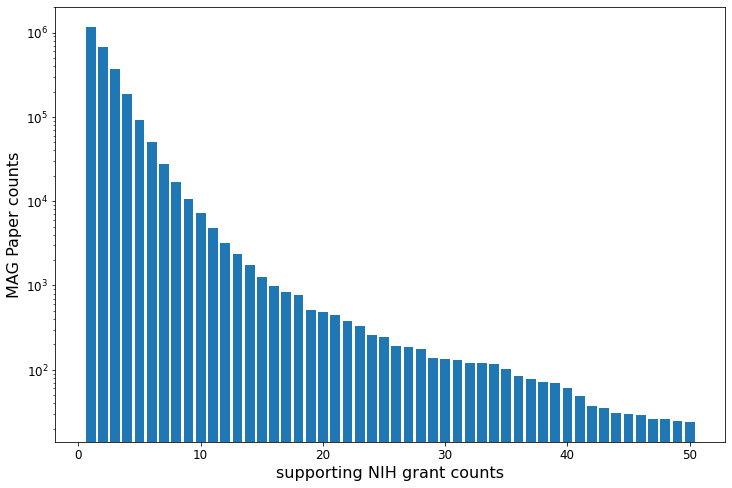

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
colors = [i for i in cm.get_cmap('tab20').colors]
fig, ax1 = plt.subplots(figsize=(12, 8))
x = np.arange(50) + 1
ax1.bar(x, 
        MAGID_NIHcount1.head(50)['count'].values,
        color=colors[0])
ax1.set_xlabel('supporting NIH grant counts', fontsize=16)
ax1.set_ylabel('MAG Paper counts', fontsize=16)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
# ax1.set_xscale('log')